In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import sys
import numpy
import time
import matplotlib
from sklearn.utils import shuffle        
#from tqdm import tqdm   # cause conflict with keras evaluate log
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm_notebook as tqdm
from scipy.spatial import distance
numpy.set_printoptions(threshold=sys.maxsize)
numpy.set_printoptions(threshold=1000)

import seaborn as sns
import random
import pandas as pd
import keras
import scipy.io
import matplotlib.pyplot as plt
#plt.style.use(['default', 'seaborn-paper'])
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.models import Model

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session
import cupy as cp
from sklearn import metrics
plt.style.use('default') 
from keras import backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

Using TensorFlow backend.


(60000, 28, 28, 1)
(60000,)


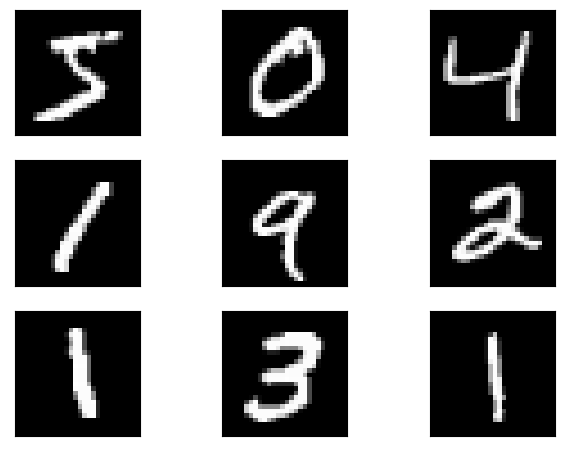

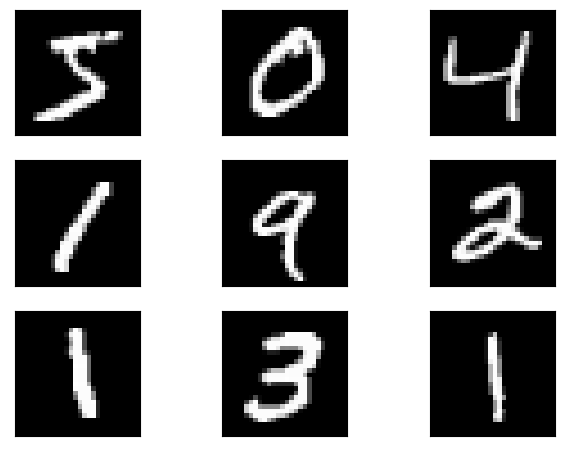

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
X_train = X_train / 255.
#y_train = to_categorical(y_train, num_classes = 10)   # to_categorical is used for recognition testing. mute it for AD.
#y_test = to_categorical(y_test, num_classes = 10)
print(X_train.shape)
print(y_train.shape)
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i].reshape((28,28)), cmap='gray', interpolation='none')
  #plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [3]:
nets = 1
#global model
model = [0] *nets

def load_my_model(directory,nets):
    for model_idx in range(nets):
        modelname = directory +'model'+str(model_idx)+' svhn2 32768'+'.h5'  
        #modelname = directory +'model'+str(model_idx) +' svhn '+'.h5'  
        model[model_idx] = tf.keras.models.load_model(modelname)
        print(modelname + ' loaded')
    #return base_model

load_my_model('../',nets)

#for i in range(nets):
 #   model[i] = load_my_model(i,'../')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
../model0 svhn2 32768.h5 loaded


In [6]:
model[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
__________

In [4]:
nets = 14
global model
model2 = [0] *nets

def load_my_model(directory,nets):
    for model_idx in range(nets):
        modelname = directory +'model'+str(model_idx)+' svhn2 32768_1'+'.h5'  
        print(modelname)
        #modelname = directory +'model'+str(model_idx) +' svhn '+'.h5'  
        model2[model_idx] = tf.keras.models.load_model(modelname)
        print(modelname + ' loaded')
    #return base_model

load_my_model('../',nets)
#for i in range(nets):
 #   model[i] = load_my_model(i,'../')

../model0 svhn2 32768_1.h5
Instructions for updating:
Use tf.cast instead.
../model0 svhn2 32768_1.h5 loaded
../model1 svhn2 32768_1.h5
../model1 svhn2 32768_1.h5 loaded
../model2 svhn2 32768_1.h5
../model2 svhn2 32768_1.h5 loaded
../model3 svhn2 32768_1.h5
../model3 svhn2 32768_1.h5 loaded
../model4 svhn2 32768_1.h5
../model4 svhn2 32768_1.h5 loaded
../model5 svhn2 32768_1.h5
../model5 svhn2 32768_1.h5 loaded
../model6 svhn2 32768_1.h5
../model6 svhn2 32768_1.h5 loaded
../model7 svhn2 32768_1.h5
../model7 svhn2 32768_1.h5 loaded
../model8 svhn2 32768_1.h5
../model8 svhn2 32768_1.h5 loaded
../model9 svhn2 32768_1.h5
../model9 svhn2 32768_1.h5 loaded
../model10 svhn2 32768_1.h5
../model10 svhn2 32768_1.h5 loaded
../model11 svhn2 32768_1.h5
../model11 svhn2 32768_1.h5 loaded
../model12 svhn2 32768_1.h5
../model12 svhn2 32768_1.h5 loaded
../model13 svhn2 32768_1.h5
../model13 svhn2 32768_1.h5 loaded


In [5]:
nets = 14
global model
model3 = [0] *nets

def load_my_model(directory,nets):
    for model_idx in range(nets):
        modelname =  directory +'model'+str(model_idx)+' svhn 32768_2'+'.h5' 
        #modelname = directory +'model'+str(model_idx) +' svhn '+'.h5'  
        model3[model_idx] = tf.keras.models.load_model(modelname)
        print(modelname + ' loaded')
    #return base_model

load_my_model('../',nets)


../model0 svhn 32768_2.h5 loaded
../model1 svhn 32768_2.h5 loaded
../model2 svhn 32768_2.h5 loaded
../model3 svhn 32768_2.h5 loaded
../model4 svhn 32768_2.h5 loaded
../model5 svhn 32768_2.h5 loaded
../model6 svhn 32768_2.h5 loaded
../model7 svhn 32768_2.h5 loaded
../model8 svhn 32768_2.h5 loaded
../model9 svhn 32768_2.h5 loaded
../model10 svhn 32768_2.h5 loaded
../model11 svhn 32768_2.h5 loaded
../model12 svhn 32768_2.h5 loaded
../model13 svhn 32768_2.h5 loaded


# Loading SVHN data set for evaluating only

In [2]:
train_data = scipy.io.loadmat('train_32x32.mat', variable_names='X').get('X')
train_labels = scipy.io.loadmat('train_32x32.mat', variable_names='y').get('y')
test_data = scipy.io.loadmat('test_32x32.mat', variable_names='X').get('X')
test_labels = scipy.io.loadmat('test_32x32.mat', variable_names='y').get('y')
extra_data = scipy.io.loadmat('extra_32x32.mat', variable_names='X').get('X')
extra_labels = scipy.io.loadmat('extra_32x32.mat', variable_names='y').get('y')

train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0
extra_labels[extra_labels == 10] = 0

train_labels = to_categorical(train_labels, num_classes = 10)
test_labels  = to_categorical(test_labels, num_classes = 10)
extra_labels = to_categorical(extra_labels, num_classes = 10)
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)
print(extra_data.shape, extra_labels.shape)

X_train_c = train_data.transpose((3,0,1,2))
y_train  = train_labels
X_test_c = test_data.transpose((3,0,1,2))
y_test  = test_labels
print(X_train_c.shape, y_train.shape)
print(X_test_c.shape, y_test.shape)

(32, 32, 3, 73257) (73257, 10)
(32, 32, 3, 26032) (26032, 10)
(32, 32, 3, 531131) (531131, 10)
(73257, 32, 32, 3) (73257, 10)
(26032, 32, 32, 3) (26032, 10)


In [13]:

X_train = im2gray(X_train_c)[:,:,:,0]
X_test = im2gray(X_test_c)[:,:,:,0]
#valid_data_c = im2gray(valid_data)[:,:,:,0]

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)



print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#print(valid_data_c.shape, valid_labels.shape)

X_train_resized = np.zeros([len(X_train),28,28,1])
X_test_resized = np.zeros([len(X_test),28,28,1])
for i in range(len(X_train)):
    im = Image.fromarray(X_train[i,:,:,0])
    im = im.resize([28,28],Image.LANCZOS) 
    X_train_resized[i,:,:,0] = np.asarray(im)
    
for i in range(len(X_test)):
    im = Image.fromarray(X_test[i,:,:,0])
    im = im.resize([28,28],Image.LANCZOS) 
    X_test_resized[i,:,:,0] = np.asarray(im)
    
print(X_train_resized.shape, y_train.shape)
print(X_test_resized.shape, y_test.shape)

y_train = np.argmax((y_train),axis = 1) # reverse one-hot label
#print(X_train.shape)   

    
# Maybe just compute the activations of all set at once, then do the splitting 

############ Maybe a futer for loop here         
#normal_set = [0]*9
#anomaly_set = [0]*9
#print(len(anomaly_set))

(73257, 32, 32, 1) (73257, 10)
(26032, 32, 32, 1) (26032, 10)
(73257, 28, 28, 1) (73257, 10)
(26032, 28, 28, 1) (26032, 10)


In [6]:
def computeRoc(score,num_Threshold,label):
    num_Threshold +=1 # Increment by one so the threshold can cover min and max
    TPR = np.zeros(num_Threshold)
    FPR = np.zeros(num_Threshold)
    score_max = np.max(score)
    score_min = np.min(score)
    tp_history = np.zeros(num_Threshold)
    fp_history = np.zeros(num_Threshold)
    fn_history = np.zeros(num_Threshold)
    tn_history = np.zeros(num_Threshold)
    for p in range(num_Threshold):
        threshold = score_min + ((score_max-score_min)/(num_Threshold-1))*p
        #print(threshold)
        thresholded = (score>threshold) * score
        tp=0
        fp=0
        predictedP = np.count_nonzero(thresholded)
        predictedN = np.count_nonzero(thresholded==0)
        realP = np.count_nonzero(label)
        realN = np.count_nonzero(label==0)   
        for i in range(thresholded.shape[0]):
            if np.abs(thresholded[i]) >0:

                if label[i] >0:
                    tp+=1
                else:
                    fp+=1
        fn_history[p] = realP - tp
        tn_history[p] = realN - fp
        tp_history[p] =  tp
        fp_history[p] =  fp
        TPR[p] = tp/(tp+fn_history[p])
        FPR[p] = fp/(fp+tn_history[p])
    #print(thresholded)
    return {'TPR':TPR, 'FPR':FPR,'fn':fn_history,'tn':tn_history,'tp':tp_history,'fp':fp_history }

def im2gray(image):
    '''Normalize images'''
    image = image.astype(float)
    # Use the Conversion Method in This Paper:
    # [http://www.eyemaginary.com/Rendering/TurnColorsGray.pdf]
    image_gray = np.dot(image, [[0.2989],[0.5870],[0.1140]])
    return image_gray

def split_up_set(anomaly_label,X_train_activation,train_int,net_size):
    anomaly_idx = np.where(train_int==anomaly_label)[0] # array inside a tuple, so take it out
    anomaly_mask = (train_int==anomaly_label)*1
    #global anamoaly_set
    #anomaly_set = np.zeros((net_size,len(anomaly_idx),))   # No idea why there is a comma
    anomaly_set = np.zeros((net_size,len(anomaly_idx)))
    #global normal_set
    normal_set   = np.zeros((net_size,len(X_train_activation)-len(anomaly_idx)))
#print(len(anomaly_idx[0])) # array inside a tuple, so take it out
    #print(len(anomaly_idx))
    #print(anamoaly_set.shape)
    #print(normal_set.shape)
    count_anomaly = 0
    count_normal = 0
    for i in range(len(X_train_activation)):    
    #print(i)
        if  anomaly_mask[i] == 1:
            anomaly_set[:,count_anomaly] = X_train_activation[i,:]
            count_anomaly +=  1  
            
        else:
            try:
                normal_set[:,count_normal] = X_train_activation[i,:]
                count_normal +=  1
            except IndexError:
                print(count_anomaly)
                print(count_normal+count_anomaly)
                break
    return normal_set, anomaly_set


def split_up_set_rawimage(anomaly_label,X_train_shuffle,train_int):
    num_data, img_dim,_,num_channel  = X_train_shuffle.shape
    X_train_activation = X_train_shuffle.reshape((num_data,img_dim**2))
    net_size = img_dim**2
    anomaly_idx = np.where(train_int==anomaly_label)[0] # array inside a tuple, so take it out
    anomaly_mask = (train_int==anomaly_label)*1
    #global anamoaly_set
    #anomaly_set = np.zeros((net_size,len(anomaly_idx),))   # No idea why there is a comma
    anomaly_set = np.zeros((net_size,len(anomaly_idx)))
    #global normal_set
    normal_set   = np.zeros((net_size,len(X_train_activation)-len(anomaly_idx)))
#print(len(anomaly_idx[0])) # array inside a tuple, so take it out
    #print(len(anomaly_idx))
    #print(anamoaly_set.shape)
    #print(normal_set.shape)
    count_anomaly = 0
    count_normal = 0
    for i in range(len(X_train_activation)):    
    #print(i)
        if  anomaly_mask[i] == 1:
            anomaly_set[:,count_anomaly] = X_train_activation[i,:]
            count_anomaly +=  1  
            
        else:
            try:
                normal_set[:,count_normal] = X_train_activation[i,:]
                count_normal +=  1
            except IndexError:
                print(count_anomaly)
                print(count_normal+count_anomaly)
                break
    return normal_set, anomaly_set

In [7]:
def prediction_representations(model,model_idx,X_train_resized):
    base_model = model[model_idx]
    #layer_outputs = [layer.output for layer in base_model.layers]
    activation_model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.layers[15].output)
    #sample_size = 10000
    #test_size = 4000
    #sample_img_normal = normal_set[anomaly_int][0,:,:,0].reshape(28,28)    ### This is a bad var name, change it in the future
    #activations = activation_model.predict(sample_img_normal.reshape(1,28,28,1))
    #net_size = len(activations[15][0,:])
    #output_sample = np.zeros((net_size,sample_size)) #[0]*net_size

    
    net_size = activation_model.layers[-1].get_config()['units']
    X_train_activation = np.zeros((X_train_resized.shape[0],net_size))
    #for i in range(X_train_resized.shape[0]):
      #  activations = activation_model.predict(X_train_resized[i,:,:,:].reshape(1,28,28,1))
       # X_train_activation[i,:] = activations
    X_train_activation = activation_model.predict(X_train_resized)
    return net_size, X_train_activation

In [8]:
def gau_fitting(normal_set,anomaly_set,anomaly_int,sample_size,test_size,net_size):
    epsilon = 0.00001
    
    output_sample = np.zeros((net_size,sample_size))
    output_sample = normal_set[anomaly_int][:,0:sample_size]
    
    output_anomaly = np.zeros((net_size,test_size))
    output_anomaly = anomaly_set[anomaly_int][:,0:test_size]

    output_normal = np.zeros((net_size,test_size))
    output_normal = normal_set[anomaly_int][:,sample_size:(sample_size+test_size)]

    
    mu  = np.expand_dims(np.mean(output_sample,axis=1),axis=0) 
    sample_cov = np.cov(output_sample)  
    sample_cov = sample_cov + epsilon*np.identity(sample_cov.shape[0])
    covi = np.linalg.inv(sample_cov)
    ######### Mahalanobis Distance
    distance_anomaly = np.zeros(output_anomaly.shape[1]) 
    for i in range(output_anomaly.shape[1]):
        distance_anomaly[i] = ((output_anomaly[:,i] )- mu) @ covi @ ((output_anomaly[:,i] )- mu).T
    
    distance_normal = np.zeros(output_normal.shape[1]) 
    for i in range(output_normal.shape[1]):
        distance_normal[i] = ((output_normal[:,i] )- mu) @ covi @ ((output_normal[:,i] )- mu).T    
    
    ##### Ready for ROC
    score = np.append(distance_normal,distance_anomaly)
    label_anomaly  = np.ones(distance_anomaly.shape)
    label_normal = np.zeros(distance_normal.shape)
    label_ROC = (np.append(label_normal,label_anomaly))
    return score,label_ROC

In [9]:
def gau_fitting2(normal_set,anomaly_set,sample_size,test_size,net_size,epsilon):
    #epsilon = 0.00001
    
    output_sample = np.zeros((net_size,sample_size))
    output_sample = normal_set[:,0:sample_size]
    
    output_anomaly = np.zeros((net_size,test_size))
    output_anomaly = anomaly_set[:,0:test_size]

    output_normal = np.zeros((net_size,test_size))
    output_normal = normal_set[:,sample_size:(sample_size+test_size)]

    
    mu  = np.expand_dims(np.mean(output_sample,axis=1),axis=0) 
    sample_cov = np.cov(output_sample)  
    sample_cov = sample_cov + epsilon*np.identity(sample_cov.shape[0])
    covi = np.linalg.inv(sample_cov)
    ######### Mahalanobis Distance
    distance_anomaly = np.zeros(output_anomaly.shape[1]) 
   #print(distance_anomaly.shape)
    for i in range(output_anomaly.shape[1]):
        distance_anomaly[i] = ((output_anomaly[:,i] )- mu) @ covi @ ((output_anomaly[:,i] )- mu).T
    #print(output_anomaly[:,i].shape)
    distance_normal = np.zeros(output_normal.shape[1]) 
    for i in range(output_normal.shape[1]):
        distance_normal[i] = ((output_normal[:,i] )- mu) @ covi @ ((output_normal[:,i] )- mu).T    

    ##### Ready for ROC
    score = np.append(distance_normal,distance_anomaly)
    label_anomaly  = np.ones(distance_anomaly.shape)
    label_normal = np.zeros(distance_normal.shape)
    label_ROC = (np.append(label_normal,label_anomaly))
    return score,label_ROC

#score4,label_ROC4 = gau_fitting2(normal_set,anomaly_set,sample_size,test_size,net_size,eps)

In [10]:
def gau_fitting3(normal_set,anomaly_set,sample_size,test_size,net_size,epsilon):
    #epsilon = 0.01
    
    #output_sample = np.zeros((net_size,sample_size))
    output_sample = normal_set[:,0:sample_size]
    
    #output_anomaly = np.zeros((net_size,test_size))
    output_anomaly = anomaly_set[:,0:test_size]

   # output_normal = np.zeros((net_size,test_size))
    output_normal = normal_set[:,sample_size:(sample_size+test_size)]

    
    mu  = np.expand_dims(np.mean(output_sample,axis=1),axis=-1) 
    sample_cov = np.cov(output_sample)  
    sample_cov = sample_cov + epsilon*np.identity(sample_cov.shape[0])
    #covi = np.identity(sample_cov.shape[0]) *(1/np.diagonal(sample_cov))
    covi = np.linalg.inv(sample_cov)
    #covi = np.linalg.inv(covidiag)
    ######### Mahalanobis Distance
    distance_anomaly = np.zeros((output_anomaly.shape[1],1)) 
    
    #print(output_anomaly.shape)
    #print(mu.shape)
    #print(covi.shape)
    #print(distance_anomaly.shape)
    diff = output_anomaly[ :, :].T - mu.T[:, np.newaxis, :]
    distance_anomaly = np.einsum('jil,jil->ij',np.tensordot(diff, covi.T, axes=(2,0)), diff)
    #print(np.repeat(covi,output_anomaly.shape[1],axis=2).shape)
    #test3 = np.einsum('ijk,jj->iik', test2, covi) 
    
    
    #distance_anomaly = distance.mahalanobis(output_anomaly,mu,covi)
    #for i in range(output_anomaly.shape[1]):
        #distance_anomaly[i] = ((output_anomaly[:,i] )- mu) @ covi @ ((output_anomaly[:,i] )- mu).T
    distance_normal = np.zeros((output_normal.shape[1],1)) 
    diff = output_normal[ :, :].T - mu.T[:, np.newaxis, :]
    distance_normal = np.einsum('jil,jil->ij',np.tensordot(diff, covi.T, axes=(2,0)), diff)
    #for i in range(output_normal.shape[1]):
       # distance_normal[i] = ((output_normal[:,i] )- mu) @ covi @ ((output_normal[:,i] )- mu).T    

    ##### Ready for ROC
    score = np.append(distance_normal,distance_anomaly)
    label_anomaly  = np.ones(distance_anomaly.shape)
    label_normal = np.zeros(distance_normal.shape)
    label_ROC = (np.append(label_normal,label_anomaly))
    return score,label_ROC

#score3,label_ROC3 = gau_fitting3(normal_set,anomaly_set,sample_size,test_size,net_size,eps)

In [11]:
def gau_fitting_cupy(normal_set,anomaly_set,sample_size,test_size,net_size,epsilon):
    #epsilon = 0.01
    
    #output_sample = cp.zeros((net_size,sample_size))
    output_sample = cp.asarray(normal_set[:,0:sample_size])
    
    #output_anomaly = cp.zeros((net_size,test_size))
    output_anomaly = cp.asarray(anomaly_set[:,0:test_size])

    #output_normal = cp.zeros((net_size,test_size))
    output_normal = cp.asarray(normal_set[:,sample_size:(sample_size+test_size)])

    
    mu  = cp.expand_dims(cp.mean((output_sample),axis=1),axis=-1) 
    sample_cov = np.cov(output_sample.get())  
    sample_cov = sample_cov + epsilon*np.identity(sample_cov.shape[0])
    #covi = np.identity(sample_cov.shape[0]) *(1/np.diagonal(sample_cov))
    #covdet= np.linalg.cond(sample_cov.get())
    #print('covdet is '+str(covdet))

    '''
    covdet= cp.linalg.det(sample_cov)
    if (covdet==0):
        print(covdet)
        print(sample_cov)
        raise LinAlgError('Determinant is '+str(covdet))
    '''
    covinv = np.linalg.inv((sample_cov))
    countnan = np.sum(np.isnan(covinv) * 1)
    if(countnan>0):
        raise LinAlgError('Number of NaN is '+ str(countnan)+ ' Matrix might be non-invertible')
        return 0

    #covi = np.linalg.inv(covidiag)
    ######### Mahalanobis Distance
    distance_anomaly = cp.zeros((output_anomaly.shape[1],1)) 
    covi = cp.asarray(covinv)
    #print(output_anomaly.shape)
    #print(mu.shape)
    #print(covi.shape)
    #print(distance_anomaly.shape)
    diff = output_anomaly[ :, :].T - mu.T[:, np.newaxis, :]
    distance_anomaly = cp.einsum('jil,jil->ij',cp.tensordot(diff, covi.T, axes=(2,0)), diff)
    #print(np.repeat(covi,output_anomaly.shape[1],axis=2).shape)
    #test3 = np.einsum('ijk,jj->iik', test2, covi) 
    
    
    #distance_anomaly = distance.mahalanobis(output_anomaly,mu,covi)
    #for i in range(output_anomaly.shape[1]):
        #distance_anomaly[i] = ((output_anomaly[:,i] )- mu) @ covi @ ((output_anomaly[:,i] )- mu).T
    distance_normal = cp.zeros((output_normal.shape[1],1)) 
    diff = output_normal[ :, :].T - mu.T[:, cp.newaxis, :]
    distance_normal = cp.einsum('jil,jil->ij',cp.tensordot(diff, covi.T, axes=(2,0)), diff)
    #for i in range(output_normal.shape[1]):
       # distance_normal[i] = ((output_normal[:,i] )- mu) @ covi @ ((output_normal[:,i] )- mu).T    

    ##### Ready for ROC
    #start = time.time()
    score = np.append(distance_normal.get(),distance_anomaly.get())
    #end = time.time()
    print(end-start)
    label_anomaly  = np.ones(distance_anomaly.shape)
    label_normal = np.zeros(distance_normal.shape)
    label_ROC = (np.append(label_normal,label_anomaly))
    return score,label_ROC

#score2,label_ROC2 = gau_fitting_cupy(normal_set,anomaly_set,sample_size,test_size,net_size,eps)

In [12]:
def gau_fitting_cuda(normal_set,anomaly_set,sample_size,test_size,net_size,epsilon):
    #epsilon = 0.00001
    
    #output_sample = cp.zeros((net_size,sample_size))
    output_sample = cp.asarray(normal_set[:,0:sample_size])
    
    #output_anomaly = cp.zeros((net_size,test_size))
    output_anomaly = cp.asarray(anomaly_set[:,0:test_size])

    #output_normal = cp.zeros((net_size,test_size))
    output_normal = cp.asarray(normal_set[:,sample_size:(sample_size+test_size)])

    
    mu  = cp.expand_dims(cp.mean(output_sample,axis=1),axis=0) 
    sample_cov = cp.cov(output_sample)  
    sample_cov = sample_cov + epsilon*cp.identity(sample_cov.shape[0])
    covi = cp.linalg.inv(sample_cov)
    ######### Mahalanobis Distance
    distance_anomaly = cp.zeros(output_anomaly.shape[1]) 
   #print(distance_anomaly.shape)
    for i in range(output_anomaly.shape[1]):
        #distance_anomaly[i] = ((output_anomaly[:,i] )- mu) @ covi @ ((output_anomaly[:,i] )- mu).T

        #print(cp.matmul(cp.matmul(((output_anomaly[:,i] )- mu),covi),   ((output_anomaly[:,i] )- mu).T  ).shape)
        distance_anomaly[i] = cp.matmul(cp.matmul(((output_anomaly[:,i] )- mu),covi),   ((output_anomaly[:,i] )- mu).T  )[0,0]
    #print(output_anomaly[:,i].shape)
    distance_normal = cp.zeros(output_normal.shape[1]) 
    for i in range(output_normal.shape[1]):
        #distance_normal[i] = ((output_normal[:,i] )- mu) @ covi @ ((output_normal[:,i] )- mu).T    
        distance_anomaly[i] = cp.matmul(cp.matmul(((output_normal[:,i] )- mu),covi),   ((output_normal[:,i] )- mu).T  )[0,0]

        
    ##### Ready for ROC
    score = np.append(distance_normal.get(),distance_anomaly.get())
    label_anomaly  = np.ones(distance_anomaly.shape)
    label_normal = np.zeros(distance_normal.shape)
    label_ROC = (np.append(label_normal,label_anomaly))
    return score,label_ROC

#score,label_ROC = gau_fitting_cuda(normal_set,anomaly_set,sample_size,test_size,net_size,eps)

The multivariate normal (MVN) distribution is a common model choice for these simulations because 1) it often arises naturally due to the Central Limit Theorem, 2) it has many useful properties that make data manipulation convenient, and 3) data can often be transformed to MVN even if that is not their underlying distribution.

In [21]:
#distance_anomaly = np.zeros(output_anomaly.shape[1]) 
#for i in range(output_anomaly.shape[1]):
 #   distance_anomaly[i] = ((output_anomaly[:,i] )- mu) @ np.linalg.inv(sample_cov) @ ((output_anomaly[:,i] )- mu).T
    
#distance_normal = np.zeros(output_normal_test.shape[1]) 
#for i in range(output_normal_test.shape[1]):
 #   distance_normal[i] = ((output_normal_test[:,i] )- mu) @ np.linalg.inv(sample_cov) @ ((output_normal_test[:,i] )- mu).T    
    
############## test with sample set
#distance_normal = np.zeros(output_sample.shape[1]) 
#for i in range(output_sample.shape[1]):
 #   distance_normal[i] = ((output_sample[:,i] )- mu) @ np.linalg.inv(sample_cov) @ ((output_sample[:,i] )- mu).T    

In [9]:
#score = np.append(distance_normal,distance_anomaly)
#label_anomaly  = np.ones(distance_anomaly.shape)
#label_normal = np.zeros(distance_normal.shape)
#label_ROC = (np.append(label_normal,label_anomaly))
#print(score.shape)
#newResultDict1 = computeRoc(score,1000,label_ROC)

In [27]:

#test_anomaly  = np.ones(distance_anomaly.shape)
#test_normal = np.zeros(distance_normal.shape)
#test_label = (np.append(test_anomaly,test_normal))
#count = 0
#for i in range(4000):
    #if label_ROC[sorted_idx[i]] == 0:
      #  count += 1
        
#X_train = X_train_resized  # This is for MNIST CNN AD    
        
X_train_shuffle,y_train_shuffle = shuffle(X_train[0:10000],y_train[0:10000],random_state=2)        

sample_size = 5000
test_size = 1000
net_result =[]   
start = time.time()
epsilon = 0.001

for net_idx in range(nets):
    print('Network: '+str(net_idx))

    net_size, X_train_activation = prediction_representations(model2,net_idx,X_train_shuffle)
    resultDict = []      
    for i in tqdm(range(10)):    
        normal_set = []
        anomaly_set = []
    #
        #print(i)
        #normal_set_temp, anomaly_set_temp = split_up_set(i,X_train_activation,y_train_shuffle,net_size) 
        normal_set, anomaly_set = split_up_set(i,X_train_activation,y_train_shuffle,net_size) 
  
        #normal_set.append(normal_set_temp)
        #anomaly_set.append(anomaly_set_temp)
        #score,label_ROC = gau_fitting2(normal_set,anomaly_set,i,sample_size,test_size,net_size)
        score,label_ROC = gau_fitting3(normal_set,anomaly_set,sample_size,test_size,net_size,epsilon) ## I'm using gaufit 3!
        resultDict.append(computeRoc(score,1000,label_ROC))
        del normal_set
        del anomaly_set
    net_result.append(resultDict) 

end = time.time()
print(end-start)
                

Network: 0


Network: 1


Network: 2


Network: 3


Network: 4


Network: 5


Network: 6


Network: 7


Network: 8


Network: 9


Network: 10


Network: 11


Network: 12


Network: 13


2302.570853948593


In [24]:


X_train_shuffle,y_train_shuffle = shuffle(X_train[0:10000],y_train[0:10000],random_state=2)        
sample_size = 5000
test_size = 1000
net_idx = 12
print('Network: '+str(net_idx))
start = time.time()
net_size, X_train_activation = prediction_representations(model2,net_idx,X_train_shuffle)
end = time.time()
print(end-start)
#epsilon = 0.001


Network: 12
4.912836790084839


In [12]:
from keras import backend as K
import gc
gc.collect()
K.clear_session()
#del model
#from numba import cuda
#cuda.select_device(0)
#cuda.close()
#cuda.select_device(0)


In [13]:
del normal_set
del anomaly_set

In [26]:

from numpy.linalg import LinAlgError

#epsilon = [0,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001]
epsilon = [0,0.1,0.01,0.001,0.0001,0.00001,0.000001]
auc_overall = np.zeros((1,len(epsilon)))
count = 0
for eps in epsilon:
    net_result =[]  

    resultDict = []   
    auc_score = np.zeros((1,10))
    try:
        for i in tqdm(range(10)):   
            normal_set = []
            anomaly_set = []
            #start = time.time()
            normal_set, anomaly_set = split_up_set(i,X_train_activation,y_train_shuffle,net_size) 
            #end = time.time()
            #print(end-start)
            #score,label_ROC = gau_fitting_cuda(normal_set,anomaly_set,sample_size,test_size,net_size,eps) ## I'm using gaufit 3!
            score,label_ROC = gau_fitting3(normal_set,anomaly_set,sample_size,test_size,net_size,eps)
            #start = time.time()
            resultDict.append(computeRoc(score,1000,label_ROC))
            #end = time.time()
            #print(end-start)
            del normal_set
            del anomaly_set
    except LinAlgError:
            print('Singular Matrix,skip')
            del normal_set
            del anomaly_set
            #resultDict.append({'TPR':0, 'FPR':0,'fn':0,'tn':0,'tp':0,'fp':0})
            auc_overall[0,count] = 0
            count+=1
            continue
    net_result.append(resultDict) 
    #del normal_set
    #del anomaly_set

    for j in range(10):
        auc_score[0,j] = metrics.auc(net_result[0][j]['FPR'], net_result[0][j]['TPR'])
    auc_overall[0,count] = np.mean(auc_score,axis=1)
    count+=1
print(auc_overall)

Singular Matrix,skip


KeyboardInterrupt: 

## BaseLine Test

# AD FOR MNIST

In [61]:
 
sample_size = 5000
test_size = 1000
from numpy.linalg import LinAlgError
#epsilon = [0,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001]
epsilon = 0.1
num_states = 1
auc_overall = np.zeros((1,num_states))
count = 0
for states_idx in range(num_states):
    X_train_shuffle,y_train_shuffle = shuffle(X_train[0:10000],y_train[0:10000],random_state=2)       
    net_result =[]  

    resultDict = []   
    auc_score = np.zeros((1,10))
    try:
        for i in tqdm(range(10)):   
            normal_set = []
            anomaly_set = []
            #start = time.time()
            normal_set, anomaly_set = split_up_set_rawimage(i,X_train_shuffle,y_train_shuffle)
            #end = time.time()
            #print(end-start)
            #score,label_ROC = gau_fitting_cuda(normal_set,anomaly_set,sample_size,test_size,net_size,eps) ## I'm using gaufit 3!
            score,label_ROC = gau_fitting3(normal_set,anomaly_set,sample_size,test_size,0,epsilon)
            #start = time.time()
            resultDict.append(computeRoc(score,1000,label_ROC))
            #end = time.time()
            #print(end-start)
            del normal_set
            del anomaly_set
    except LinAlgError:
            print('Singular Matrix,skip')
            del normal_set
            del anomaly_set
            #resultDict.append({'TPR':0, 'FPR':0,'fn':0,'tn':0,'tp':0,'fp':0})
            auc_overall[0,count] = 0
            count+=1
            continue
    net_result.append(resultDict) 
    #del normal_set
    #del anomaly_set

    for j in range(10):
        auc_score[0,j] = metrics.auc(net_result[0][j]['FPR'], net_result[0][j]['TPR'])
    auc_overall[0,count] = np.mean(auc_score,axis=1)
    count+=1
print(auc_score)
print(auc_overall)


[[0.50748173 0.464256   0.5074985  0.486593   0.5111555  0.52559267
  0.53572604 0.49892651 0.53243462 0.50975669]]
[[0.50794213]]


## AD FOR SVHN

In [ ]:
 
sample_size = 5000
test_size = 1000
from numpy.linalg import LinAlgError
#epsilon = [0,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001]
epsilon = 0.1
num_states = 1
auc_overall = np.zeros((1,num_states))
count = 0
for states_idx in range(num_states):
    X_train_shuffle,y_train_shuffle = shuffle(X_train[0:10000],y_train[0:10000],random_state=2)       
    net_result =[]  

    resultDict = []   
    auc_score = np.zeros((1,10))
    try:
        for i in tqdm(range(10)):   
            normal_set = []
            anomaly_set = []
            #start = time.time()
            normal_set, anomaly_set = split_up_set_rawimage(i,X_train_shuffle,y_train_shuffle)
            #end = time.time()
            #print(end-start)
            #score,label_ROC = gau_fitting_cuda(normal_set,anomaly_set,sample_size,test_size,net_size,eps) ## I'm using gaufit 3!
            score,label_ROC = gau_fitting3(normal_set,anomaly_set,sample_size,test_size,0,epsilon)
            #start = time.time()
            resultDict.append(computeRoc(score,1000,label_ROC))
            #end = time.time()
            #print(end-start)
            del normal_set
            del anomaly_set
    except LinAlgError:
            print('Singular Matrix,skip')
            del normal_set
            del anomaly_set
            #resultDict.append({'TPR':0, 'FPR':0,'fn':0,'tn':0,'tp':0,'fp':0})
            auc_overall[0,count] = 0
            count+=1
            continue
    net_result.append(resultDict) 
    #del normal_set
    #del anomaly_set

    for j in range(10):
        auc_score[0,j] = metrics.auc(net_result[0][j]['FPR'], net_result[0][j]['TPR'])
    auc_overall[0,count] = np.mean(auc_score,axis=1)
    count+=1
print(auc_score)
print(auc_overall)

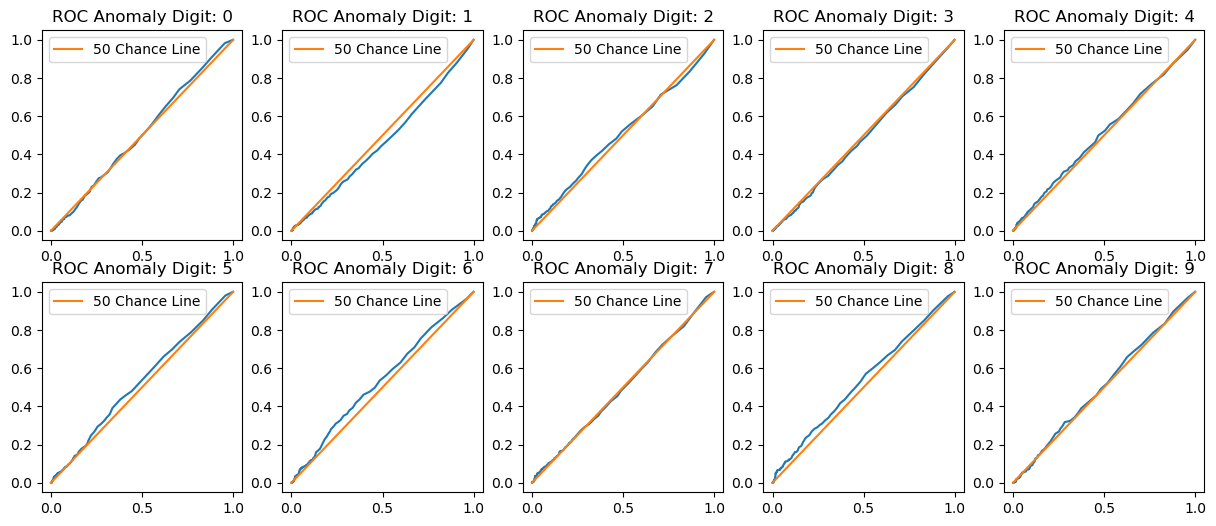

In [62]:
fig, a = plt.subplots(2,5,figsize=(15, 6))
net_idx =0
a = a.ravel()
for idx,ax in enumerate(a):
    ax.plot(net_result[net_idx][idx]['FPR'],net_result[net_idx][idx]['TPR'])
    ax.plot([0,0.5,1],[0,0.5,1],label='50 Chance Line')
    ax.set_title('ROC Anomaly Digit: '+str(idx))
    ax.legend()
    
    #print(metrics.auc(net_result[net_idx][idx]['FPR'], net_result[net_idx][idx]['TPR']))

## BaseLine Epsilon Test

In [29]:
X_train_shuffle,y_train_shuffle = shuffle(X_train[0:10000],y_train[0:10000],random_state=2)        
sample_size = 5000
test_size = 1000
from numpy.linalg import LinAlgError
#epsilon = [0,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001]
epsilon = [0,0.1,0.01,0.001,0.0001,0.00001,0.000001]
auc_overall = np.zeros((1,len(epsilon)))
count = 0
for eps in epsilon:
    net_result =[]  

    resultDict = []   
    auc_score = np.zeros((1,10))
    try:
        for i in tqdm(range(10)):   
            normal_set = []
            anomaly_set = []
            #start = time.time()
            normal_set, anomaly_set = split_up_set_rawimage(i,X_train_shuffle,y_train_shuffle)
            #end = time.time()
            #print(end-start)
            #score,label_ROC = gau_fitting_cuda(normal_set,anomaly_set,sample_size,test_size,net_size,eps) ## I'm using gaufit 3!
            score,label_ROC = gau_fitting3(normal_set,anomaly_set,sample_size,test_size,0,eps)
            #start = time.time()
            resultDict.append(computeRoc(score,1000,label_ROC))
            #end = time.time()
            #print(end-start)
            del normal_set
            del anomaly_set
    except LinAlgError:
            print('Singular Matrix,skip')
            del normal_set
            del anomaly_set
            #resultDict.append({'TPR':0, 'FPR':0,'fn':0,'tn':0,'tp':0,'fp':0})
            auc_overall[0,count] = 0
            count+=1
            continue
    net_result.append(resultDict) 
    #del normal_set
    #del anomaly_set

    for j in range(10):
        auc_score[0,j] = metrics.auc(net_result[0][j]['FPR'], net_result[0][j]['TPR'])
    auc_overall[0,count] = np.mean(auc_score,axis=1)
    count+=1
print(auc_overall)


Singular Matrix,skip



[[0.         0.68120315 0.66189182 0.64303743 0.63498464 0.62888981
  0.58374852]]


In [38]:
test = np.array([[0.   ,      0.68120315, 0.66189182, 0.64303743, 0.63498464, 0.62888981, 0.58374852]])


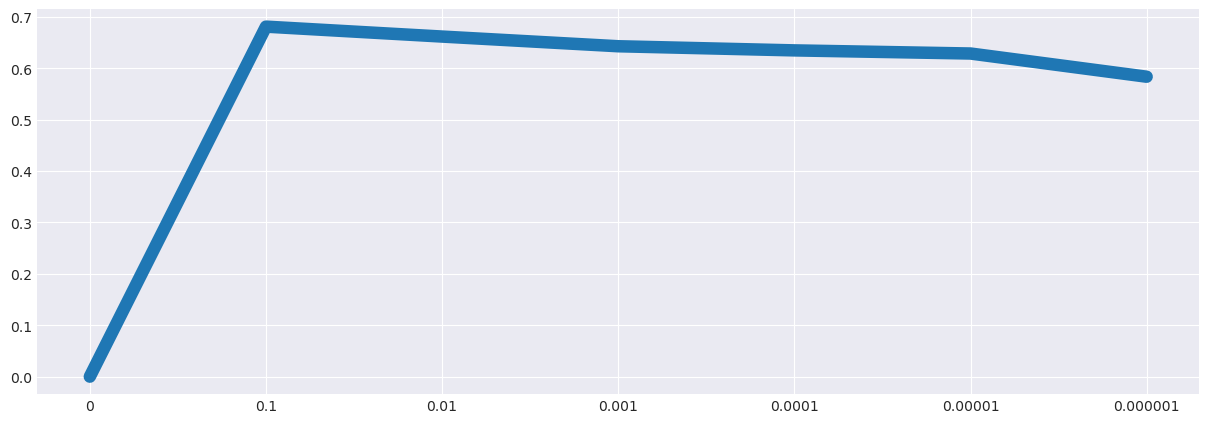

In [45]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
#pooling_size = ['2','4','8','16','32','64','128','256','512','1024','2048','4096','8192','16384']

#epsilon = ['0','0.5','0.1','0.05','0.01','0.005','0.001','0.0005','0.0001','0.00005','0.00001','0.000005','0.000001']
epsilon = ['0','0.1','0.01','0.001','0.0001','0.00001','0.000001']
states_set = ['#01','#02','#03','#04','#05','#06','#07','#08','#09','#10',]
with plt.style.context('seaborn-darkgrid'):

    plt.figure(figsize=(15,5))
    count = 0
#with plt.style.context('seaborn-darkgrid'):
#plt.plot(pooling_size,reduced_avg/10,linestyle=styles[3],linewidth=9.0)
    plt.plot((epsilon),test[0],linestyle=styles[3],linewidth=9.0) # This line plot avg of all three

    axes = plt.gca()
#axes.set_ylim([0.66,0.69])
    axes.set_xticks(epsilon)

In [80]:
np.mean(auc_overall)

NameError: name 'auc_overall' is not defined

# Data Visualization

In [4]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.base import get_data_home 
from sklearn.datasets import fetch_openml

print (get_data_home())

C:\Users\Jialin\scikit_learn_data


In [51]:
X_train_shuffle,y_train_shuffle = shuffle(X_train_resized[0:10000],y_train[0:10000],random_state=2)        

X_train_vis = X_train_shuffle.reshape(X_train_shuffle.shape[0],X_train_shuffle.shape[1]**2)

feat_cols = [ 'pixel'+str(i) for i in range(X_train_vis.shape[1]) ]
df = pd.DataFrame(X_train_vis,columns=feat_cols)
df['y'] = y_train_shuffle
df['label'] = df['y'].apply(lambda i: str(i))

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-[0]'] = pca_result[:,0]
df['pca-[1]'] = pca_result[:,1] 
df['pca-[2]'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

np.random.seed(2)

rndperm = np.random.permutation(X_train_vis.shape[0])
rndperm.shape

Explained variation per principal component: [0.59161681 0.05958522 0.04848744]


(10000,)

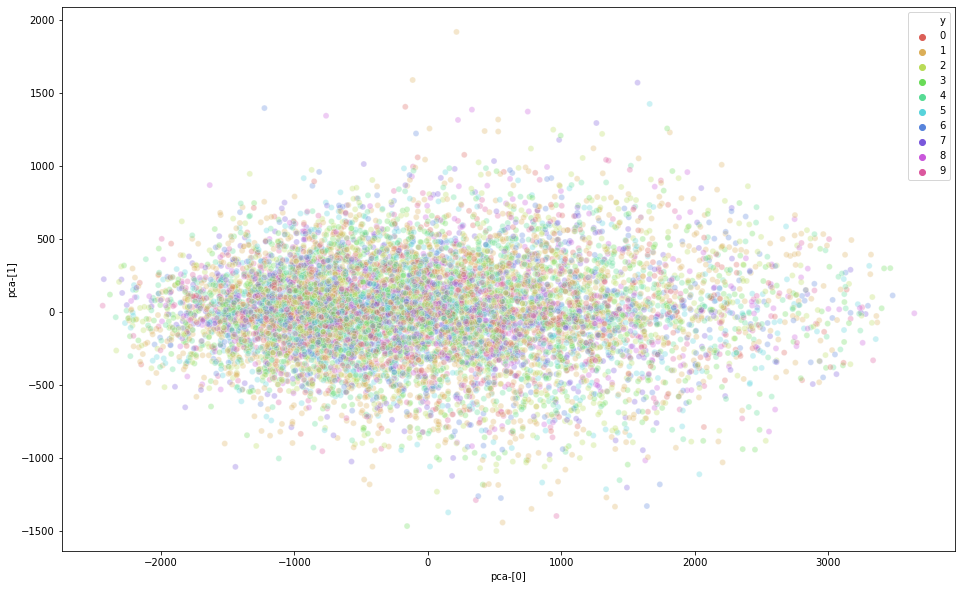

In [53]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-[0]", y="pca-[1]",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

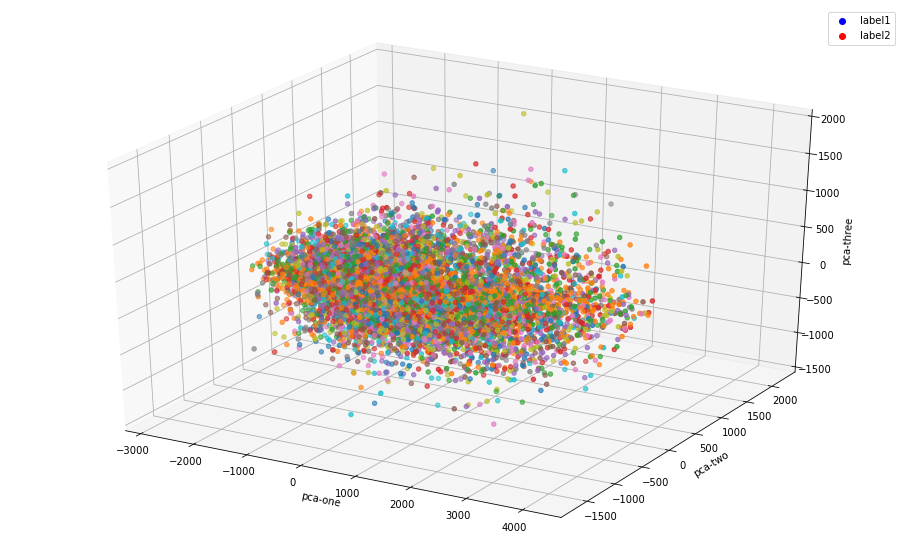

In [18]:
colors = ['blue', 'red']
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)

scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'o')
ax.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
#plt.legend([0,1,2,3,4,5,6,7,8,9,10], loc='upper left')
plt.show()

## T-sne


In [19]:
data_subset = df[feat_cols].values

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.895s...
[t-SNE] Computed neighbors for 10000 samples in 201.754s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 245.561649
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.305641
[t-SNE] KL divergence after 300 iterations: 3.128697
t-SNE done! Time elap

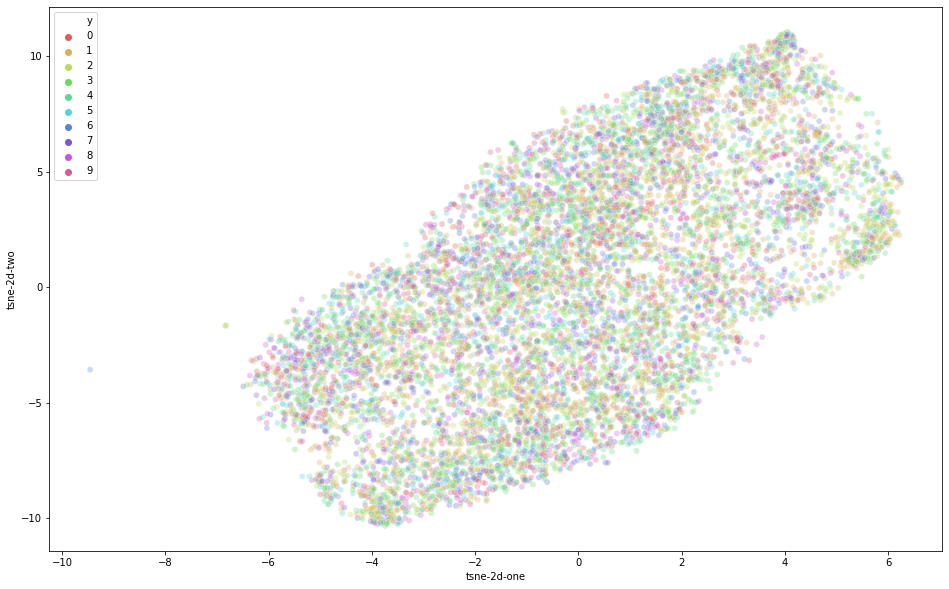

In [22]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

In [24]:
modelname = directory +'model'+str(model_idx)+' svhn2 32768'+'.h5'  

NameError: name 'modelname' is not defined

In [26]:
######## LOAD 1024 net

nets = 1
#global model
model = [0] *nets
net_set=[9]
def load_my_model(directory,nets):
    for model_idx in net_set:
        modelname = directory +'model'+str(model_idx)+' svhn2 32768'+'.h5'  
        #modelname = directory +'model'+str(model_idx) +' svhn '+'.h5'  
        model[0] = tf.keras.models.load_model(modelname)
        print(modelname + ' loaded')
    #return base_model

load_my_model('../',nets)


../model9 svhn2 32768.h5 loaded


In [32]:
X_train_shuffle,y_train_shuffle = shuffle(X_train_resized[0:10000],y_train[0:10000],random_state=2)        

In [77]:

sample_size = 5000
test_size = 1000
net_result =[]   
start = time.time()
epsilon = 0.001
net_idx =0
#for net_idx in range(1):
print('Network: '+str(net_idx))

net_size, X_train_activation = prediction_representations(model,net_idx,X_train_shuffle)
resultDict = []      
for i in tqdm(range(2)):    
    normal_set = []
    anomaly_set = []
#
    #print(i)
    #normal_set_temp, anomaly_set_temp = split_up_set(i,X_train_activation,y_train_shuffle,net_size) 
    normal_set, anomaly_set = split_up_set(i,X_train_activation,y_train_shuffle,net_size) 

    #normal_set.append(normal_set_temp)
    #anomaly_set.append(anomaly_set_temp)
    #score,label_ROC = gau_fitting2(normal_set,anomaly_set,i,sample_size,test_size,net_size)
    score,label_ROC = gau_fitting3(normal_set,anomaly_set,sample_size,test_size,net_size,epsilon) ## I'm using gaufit 3!
    resultDict.append(computeRoc(score,1000,label_ROC))
    del normal_set
    del anomaly_set
net_result.append(resultDict) 

end = time.time()
print(end-start)

Network: 0



7.612893581390381


In [34]:
X_train_activation.shape

(10000, 1024)

In [78]:
#X_train_shuffle,y_train_shuffle = shuffle(X_train_resized[0:10000],y_train_resized[0:10000],random_state=2)        

X_train_vis = X_train_activation
feat_cols = [ 'pixel'+str(i) for i in range(X_train_vis.shape[1]) ]
df = pd.DataFrame(X_train_vis,columns=feat_cols)
df['y'] = y_train_shuffle
df['label'] = df['y'].apply(lambda i: str(i))

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-[0]'] = pca_result[:,0]
df['pca-[1]'] = pca_result[:,1] 
df['pca-[2]'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

np.random.seed(2)

rndperm = np.random.permutation(X_train_vis.shape[0])
rndperm.shape

Explained variation per principal component: [0.12828769 0.09113532 0.08187   ]


(10000,)

Text(0.5, 1.0, 'Representation Distribution for SVNH')

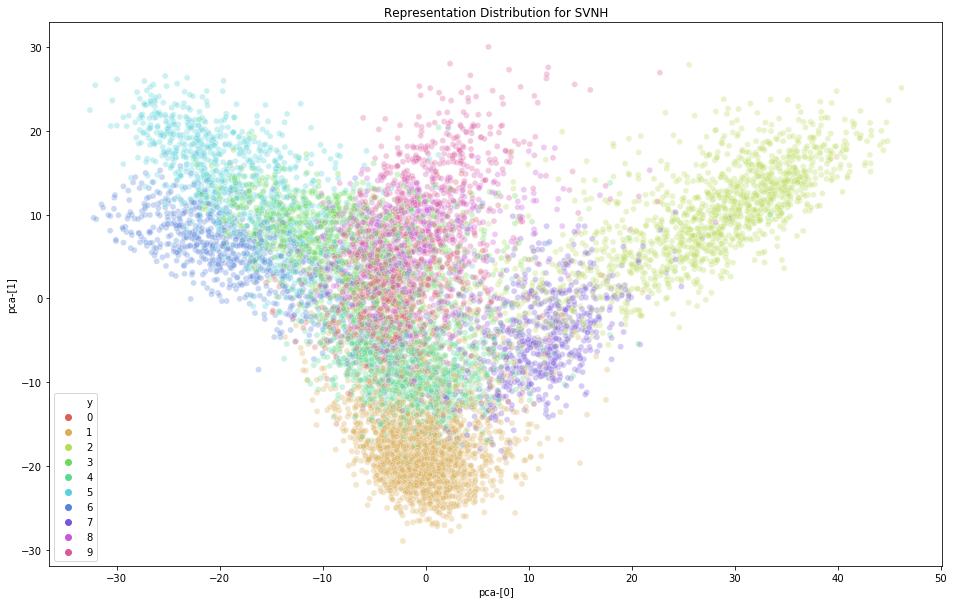

In [46]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-[0]", y="pca-[1]",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
).set_title('Representation Distribution for SVNH')

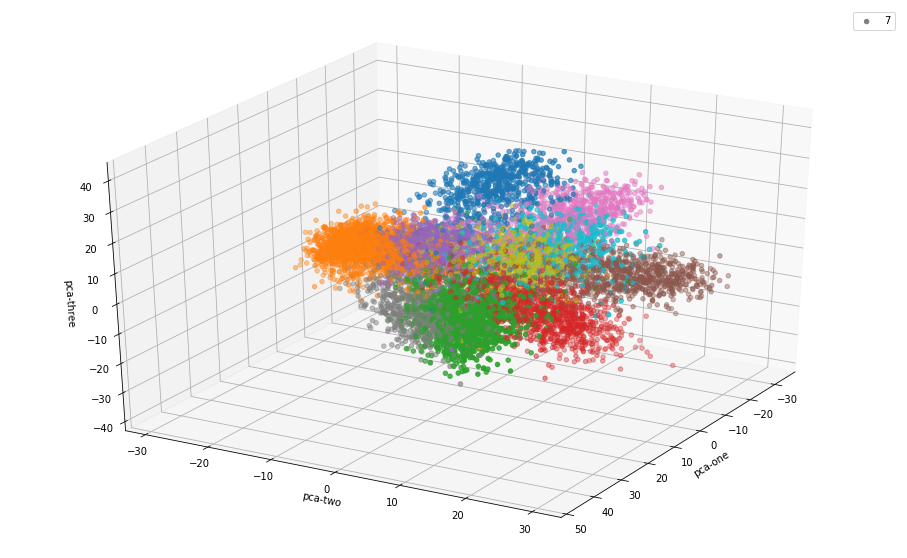

In [79]:
colors = ['blue', 'red']
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-[0]"], 
    ys=df.loc[rndperm,:]["pca-[1]"], 
    zs=df.loc[rndperm,:]["pca-[2]"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)

scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'o')
#ax.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.view_init(azim=30)
plt.legend(df.loc[rndperm,:]["y"])

#plt.legend([0,1,2,3,4,5,6,7,8,9,10], loc='upper left')
plt.show()

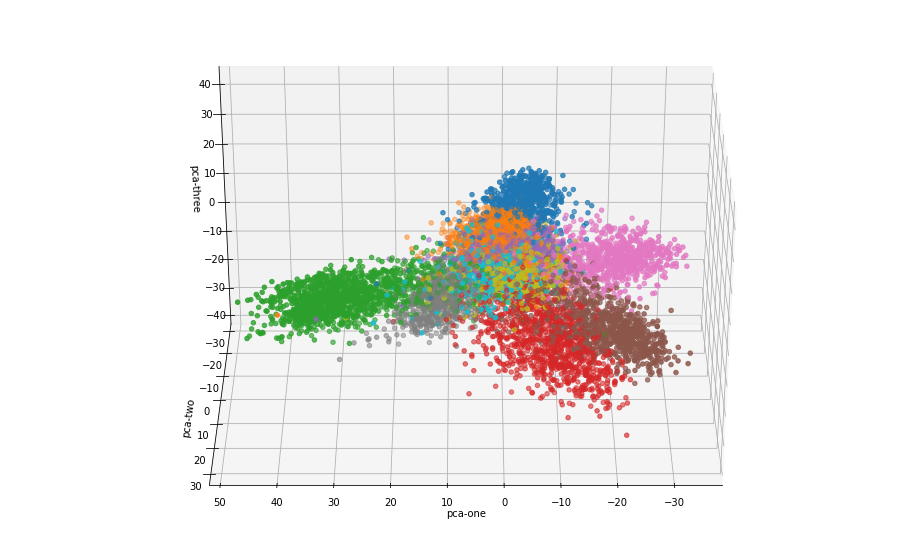

In [76]:
colors = ['blue', 'red']

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-[0]"], 
    ys=df.loc[rndperm,:]["pca-[1]"], 
    zs=df.loc[rndperm,:]["pca-[2]"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)

scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=plt.get_cmap('tab10'), marker = 'o')
scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'o')
#ax.legend([scatter1_proxy, scatter2_proxy], ['label1', 'label2'], numpoints = 1)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.view_init(azim=90)
#plt.legend([0,1,2,3,4,5,6,7,8,9,10], loc='upper left')
plt.show()

In [66]:
plt.get_cmap('tab10')

SyntaxError: invalid syntax (<ipython-input-66-dea0874bec71>, line 1)

# Loading Data

In [24]:
## READ cell
import pickle
with open("net_result0.0001.txt", "wb") as fp:
    pickle.dump(net_result,fp)

In [19]:
## lOAD cell
with open("net_result.txt", "rb") as fp:
    resultDict = pickle.load(fp)

# Single network testing cell

0.8497345000000001
0.1956015
0.8939919273461151
0.716478
0.6359214285714285
0.7713308227114716
0.8267355000000001
0.6608725000000001
0.7814502118644068


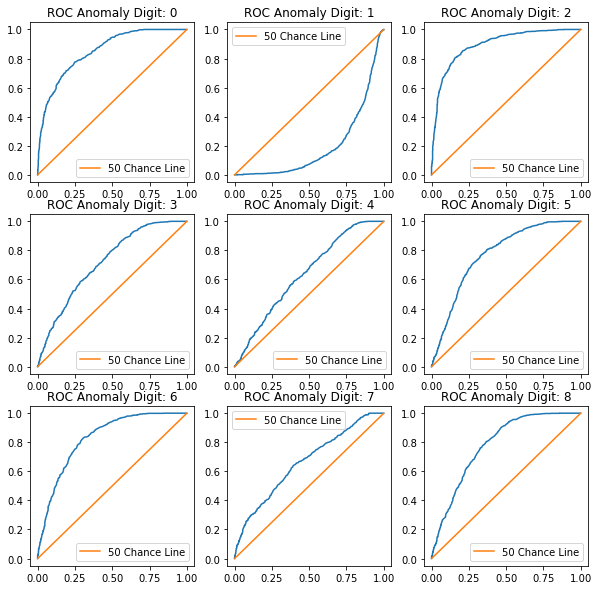

In [35]:
fig, a = plt.subplots(3,3,figsize=(10, 10))
net_idx =0
a = a.ravel()
for idx,ax in enumerate(a):
    ax.plot(net_result[net_idx][idx]['FPR'],net_result[net_idx][idx]['TPR'])
    ax.plot([0,0.5,1],[0,0.5,1],label='50 Chance Line')
    ax.set_title('ROC Anomaly Digit: '+str(idx))
    ax.legend()
    
    print(metrics.auc(net_result[net_idx][idx]['FPR'], net_result[net_idx][idx]['TPR']))

In [44]:
print(metrics.auc(net_result[net_idx][9]['FPR'], net_result[net_idx][9]['TPR']))

0.5176796250000001


In [31]:
auc_score = np.zeros((nets,10))
for i in range(nets):
    for j in range(10):
        auc_score[i,j] = metrics.auc(net_result[i][j]['FPR'], net_result[i][j]['TPR'])
    

for i in range(10):
    print(auc_score[-1,i])

0.9204189999999999
0.7850860000000001
0.908486881937437
0.829825
0.8171443877551021
0.9175168018539978
0.904495
0.7379460000000001
0.778636122881356
0.6029688139059305


In [27]:
len(net_result)

30

In [30]:
auc_score2 = np.zeros((nets,10))
for i in range(nets):
    for j in range(10):
        auc_score2[i,j] = metrics.auc(net_result2[i][j]['FPR'], net_result2[i][j]['TPR'])
    

for i in range(10):
    print(auc_score2[-1,i])

NameError: name 'net_result2' is not defined

In [123]:
auc_score3 = np.zeros((nets,10))
for i in range(nets):
    for j in range(10):
        auc_score3[i,j] = metrics.auc(net_result3[i][j]['FPR'], net_result3[i][j]['TPR'])
    

for i in range(10):
    print(auc_score3[-1,i])

0.3714755
0.45312087499999987
0.6311322500000002
0.5667190000000001
0.620808875
0.633012125
0.5636816250000001
0.55101725
0.5049173749999999
0.5467000000000002


In [41]:
(auc_score+auc_score2+auc_score3)/3

array([[0.50289742, 0.64697992, 0.50305908, 0.46225142, 0.45627604,
        0.5843315 , 0.56702496, 0.57775217, 0.46647029, 0.45627246],
       [0.68426075, 0.56642263, 0.52232546, 0.44486025, 0.54546042,
        0.45835863, 0.507591  , 0.61491737, 0.45684004, 0.49756392],
       [0.71575   , 0.423321  , 0.57004358, 0.58979129, 0.51562725,
        0.56575704, 0.65732008, 0.61366708, 0.57420233, 0.45732254],
       [0.70693196, 0.53035225, 0.72530617, 0.62601354, 0.58104171,
        0.65682971, 0.72762858, 0.61531467, 0.51906988, 0.50650571],
       [0.75027742, 0.37670838, 0.83534517, 0.70709971, 0.57828471,
        0.78138879, 0.73584971, 0.53695542, 0.65284425, 0.4463935 ],
       [0.66299275, 0.2770175 , 0.77107875, 0.72352525, 0.55864892,
        0.69098721, 0.71725538, 0.56027225, 0.57176629, 0.53240629],
       [0.72969458, 0.33556458, 0.797244  , 0.76780908, 0.62854458,
        0.83576863, 0.70965746, 0.60104204, 0.61293258, 0.52174988],
       [0.74178658, 0.30241267, 0.8342498

In [63]:
avg_auc = (auc_score+auc_score2+auc_score3+auc_score4)/4
reduced_avg = np.sum(avg_auc,axis=-1)
reduced_avg

array([5.22518912, 5.4090515 , 5.58980679, 6.04970333, 6.45660079,
       6.34161556, 6.54717071, 7.03120836, 7.02461039, 7.24201879,
       7.48351583, 7.48145289, 7.45334005, 8.05816678])

In [65]:
avg_auc

array([[0.51176825, 0.56379212, 0.51160595, 0.49541662, 0.46828865,
        0.57573218, 0.53686775, 0.62946362, 0.5119522 , 0.42030176],
       [0.564173  , 0.55949325, 0.58964039, 0.50510587, 0.49490791,
        0.51809096, 0.58451162, 0.58001225, 0.45634362, 0.55677262],
       [0.70290487, 0.5707335 , 0.60371052, 0.55560212, 0.47893763,
        0.55300478, 0.5343015 , 0.56887062, 0.4684134 , 0.55332784],
       [0.707385  , 0.38970675, 0.74865098, 0.67596225, 0.5599861 ,
        0.70822856, 0.62126225, 0.58884925, 0.56686083, 0.48281135],
       [0.76574113, 0.4577945 , 0.72935305, 0.63588   , 0.64643253,
        0.64708155, 0.7252285 , 0.67575162, 0.64901059, 0.52432733],
       [0.74083562, 0.35140563, 0.76632631, 0.75138875, 0.5886449 ,
        0.80770032, 0.737668  , 0.48786938, 0.65331462, 0.45646204],
       [0.78266788, 0.43257675, 0.79092495, 0.69692725, 0.63262895,
        0.7328989 , 0.759185  , 0.58575513, 0.62410514, 0.50950077],
       [0.80643138, 0.43176338, 0.8382874

In [48]:
auc_score2 = auc_score
with open("14nets_03.txt", "rb") as fp:
    auc_score = pickle.load(fp)
with open("14nets_05.txt", "rb") as fp:
    auc_score3 = pickle.load(fp)
with open("14nets_06.txt", "rb") as fp:
    auc_score4 = pickle.load(fp)
    

In [78]:
#auc_score4.shape
#auc_score3.shape
auc_score

array([[0.514491  , 0.8265755 , 0.42196165, 0.41021   , 0.51260561,
        0.699573  , 0.4298495 , 0.64812   , 0.38692956, 0.33422188],
       [0.4148695 , 0.5915325 , 0.68177397, 0.5026705 , 0.59174592,
        0.58297219, 0.561554  , 0.7005135 , 0.4102161 , 0.60736452],
       [0.631719  , 0.555125  , 0.55649142, 0.5748535 , 0.41099541,
        0.49816107, 0.584543  , 0.581228  , 0.52397405, 0.63012423],
       [0.6767295 , 0.3183705 , 0.76327094, 0.6733535 , 0.53667959,
        0.65357068, 0.6640215 , 0.580972  , 0.55613877, 0.39175204],
       [0.823867  , 0.408887  , 0.72613269, 0.6953215 , 0.68183469,
        0.74886095, 0.693462  , 0.746474  , 0.61710964, 0.49474489],
       [0.714926  , 0.4054535 , 0.71734763, 0.7526305 , 0.55373316,
        0.81907764, 0.637077  , 0.361977  , 0.61004078, 0.38872853],
       [0.790091  , 0.4514115 , 0.79418718, 0.6604045 , 0.67374643,
        0.79507358, 0.823074  , 0.5617095 , 0.66349364, 0.4940547 ],
       [0.846231  , 0.35442   , 0.8382805

In [77]:
auc_score2

array([[0.533417  , 0.334344  , 0.63208174, 0.443643  , 0.39729643,
        0.37545886, 0.720147  , 0.6969915 , 0.64519915, 0.43616667],
       [0.7425345 , 0.3841485 , 0.5426332 , 0.4995725 , 0.45659184,
        0.51764021, 0.6432835 , 0.489013  , 0.51589089, 0.59067536],
       [0.612878  , 0.459262  , 0.594944  , 0.6304585 , 0.47558061,
        0.63480301, 0.5537615 , 0.4746235 , 0.51730456, 0.47089826],
       [0.7507605 , 0.382608  , 0.6579894 , 0.639032  , 0.52650204,
        0.61969815, 0.536074  , 0.5740555 , 0.51424629, 0.56971063],
       [0.779418  , 0.6365635 , 0.70225984, 0.5355245 , 0.69819898,
        0.51855272, 0.7869725 , 0.595722  , 0.7045196 , 0.53416411],
       [0.8126975 , 0.4018495 , 0.83073713, 0.7877095 , 0.65631684,
        0.79184762, 0.8331245 , 0.5441635 , 0.74258263, 0.50190031],
       [0.781839  , 0.38476   , 0.75807164, 0.615334  , 0.55405306,
        0.59631634, 0.7728425 , 0.5286585 , 0.66864936, 0.42656953],
       [0.7621005 , 0.3161785 , 0.8107356

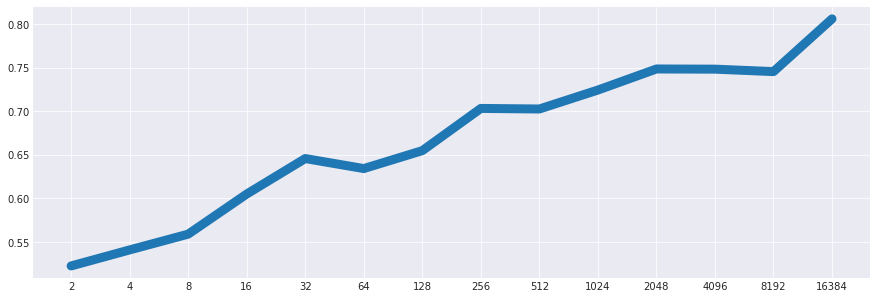

In [64]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
pooling_size = ['2','4','8','16','32','64','128','256','512','1024','2048','4096','8192','16384']
#pooling_size = ['2','4','8','16','32','64','128','256','512','1024']



plt.figure(figsize=(15,5))
count = 0
with plt.style.context('seaborn-darkgrid'):
    plt.plot(pooling_size,reduced_avg/10,linestyle=styles[3],linewidth=9.0)
    #plt.plot(pooling_size,((auc_score+auc_score2+auc_score3+auc_score4)/4)[:,:],linestyle=styles[3],linewidth=9.0) # This line plot avg of all three


    
    #count += 1
#plt.legend([0,1,2,3,4,5,6,7,8,9,10], loc='upper left')
axes = plt.gca()
axes.set_xticks(pooling_size)

#for i in range(nets):
#plt.plot(auc_score.T,linestyle=styles[i])

In [59]:
((auc_score+auc_score2+auc_score3+auc_score4)/4)[:,i]

IndexError: index 13 is out of bounds for axis 1 with size 10

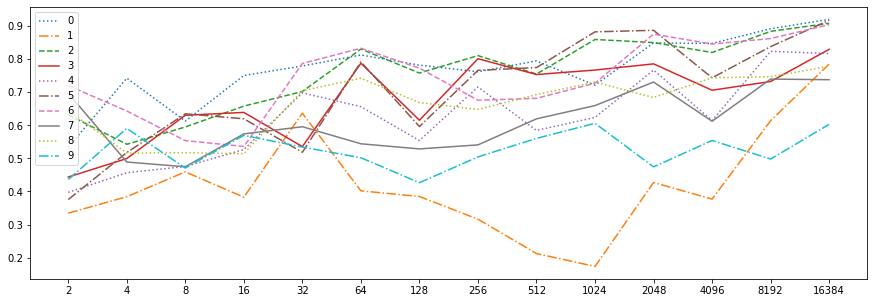

In [33]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
pooling_size = ['2','4','8','16','32','64','128','256','512','1024','2048','4096','8192','16384']
#pooling_size = ['2','4','8','16','32','64','128','256','512','1024']
plt.figure(figsize=(15,5))

count = 0
for i in range(10):
    plt.plot(pooling_size,auc_score[:,i],linestyle=styles[i])
    #plt.plot(pooling_size,((tempscore02+tempscore01+tempscore03)/3)[:,i],linestyle=styles[i]) # This line plot avg of all three
    
    #count += 1
plt.legend([0,1,2,3,4,5,6,7,8,9,10], loc='upper left')
axes = plt.gca()
axes.set_xticks(pooling_size)

#for i in range(nets):
#plt.plot(auc_score.T,linestyle=styles[i])

In [35]:
#tempmeanresult = np.mean(auc_score,axis=1)

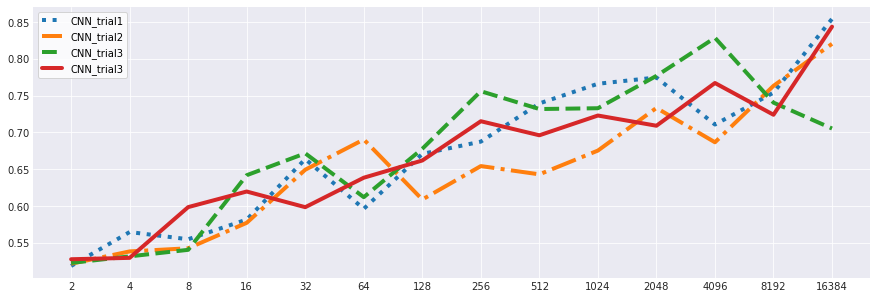

In [69]:
#styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
#pooling_size = ['2','4','8','16','32','64','128']
plt.figure(figsize=(15,5))
count = 0
#for i in range(10):
#plt.plot(pooling_size,tempmeanresult,linestyle=styles[i])
with plt.style.context('seaborn-darkgrid'):

    plt.plot(pooling_size,np.mean(auc_score,axis=1),linestyle=styles[0],linewidth=4.0) 
    plt.plot(pooling_size,np.mean(auc_score2,axis=1),linestyle=styles[1],linewidth=4.0) 
    plt.plot(pooling_size,np.mean(auc_score3,axis=1),linestyle=styles[2],linewidth=4.0) 
    plt.plot(pooling_size,np.mean(auc_score4,axis=1),linestyle=styles[3],linewidth=4.0) 

#plt.plot(pooling_size,np.mean(auc_score,axis=1),linestyle=styles[i])
    #count += 1
plt.legend(['CNN_trial1','CNN_trial2','CNN_trial3','CNN_trial3'], loc='upper left')
axes = plt.gca()
axes.set_xticks(pooling_size)

#for i in range(nets):
#plt.plot(auc_score.T,linestyle=styles[i])

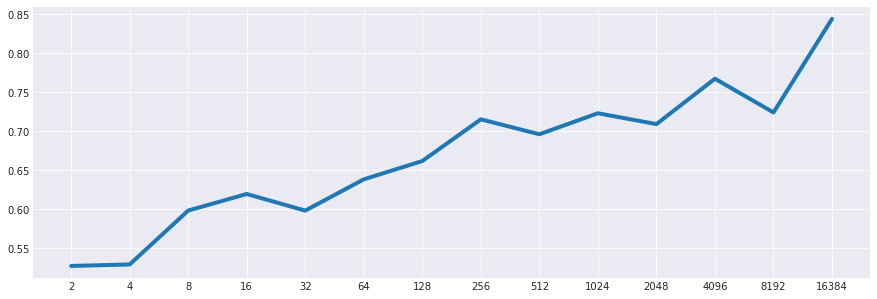

In [80]:
#styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
#pooling_size = ['2','4','8','16','32','64','128']
plt.figure(figsize=(15,5))
count = 0
#for i in range(10):
#plt.plot(pooling_size,tempmeanresult,linestyle=styles[i])
with plt.style.context('seaborn-darkgrid'):

    #tempmean = np.mean(auc_score,axis=1) + np.mean(auc_score2,axis=1) + np.mean(auc_score3,axis=1)
#plt.plot(pooling_size,np.mean(tempscore01,axis=1),linestyle=styles[i]) 
#plt.plot(pooling_size,np.mean(tempscore02,axis=1),linestyle=styles[i]) 
    #plt.plot(pooling_size,tempmean/3,linestyle=styles[7],linewidth=9.0) 
    plt.plot(pooling_size,np.mean(auc_score4,axis=1),linestyle=styles[3],linewidth=4.0)
    #count += 1
#plt.legend(['CNN_trail1','CNN_trail2','CNN_trail3'], loc='upper left')
axes = plt.gca()
axes.set_xticks(pooling_size)

#for i in range(nets):
#plt.plot(auc_score.T,linestyle=styles[i])

In [43]:
tempmean/3

array([0.52562612, 0.53933352, 0.57872295, 0.60590301, 0.66388048,
       0.67902859, 0.68932426, 0.697662  , 0.70389407, 0.68700509,
       0.73978924, 0.74413661, 0.71963725, 0.75760261])

In [34]:
## READ cell
import pickle
with open("14nets_04.txt", "wb") as fp:
    pickle.dump(auc_score,fp)

In [3]:
import pickle
## lOAD cell
with open("14nets_00.txt", "rb") as fp:
    tempscore01 = pickle.load(fp)

In [4]:
import pickle
## lOAD cell
with open("14nets_01.txt", "rb") as fp:
    tempscore02 = pickle.load(fp)

In [5]:
import pickle
## lOAD cell
with open("14nets_02.txt", "rb") as fp:
    tempscore03 = pickle.load(fp)

In [46]:
model_result = [0]*(nets)
for i in range(nets):
    model_result[i] = model[i].evaluate(X_test_resized,y_test,verbose = 0)

In [47]:
model_result2 = [0]*(nets)
for i in range(nets):
    model_result2[i] = model2[i].evaluate(X_test_resized,y_test,verbose = 0)

In [150]:
model_result3 = [0]*(nets)
for i in range(nets):
    model_result3[i] = model3[i].evaluate(X_test,y_test,verbose = 0)

In [62]:
model_result[:]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
import pickle
## lOAD cell
with open("model_test_result.txt", "rb") as fp:
    model_result3 = pickle.load(fp)
with open("model_test_result2.txt", "rb") as fp:
    model_result4 = pickle.load(fp)

In [57]:
[ele[1] for ele in model_result2[:]]

[0.7445836,
 0.92912567,
 0.93922865,
 0.9399969,
 0.94360787,
 0.9439152,
 0.9404195,
 0.939075,
 0.9437231,
 0.9388829]

In [58]:
[ele[1] for ele in model_result3[:]]

[0.83032423,
 0.93285185,
 0.9407268,
 0.942878,
 0.94418406,
 0.9391518,
 0.9421097,
 0.9426091,
 0.94330055,
 0.93630916]

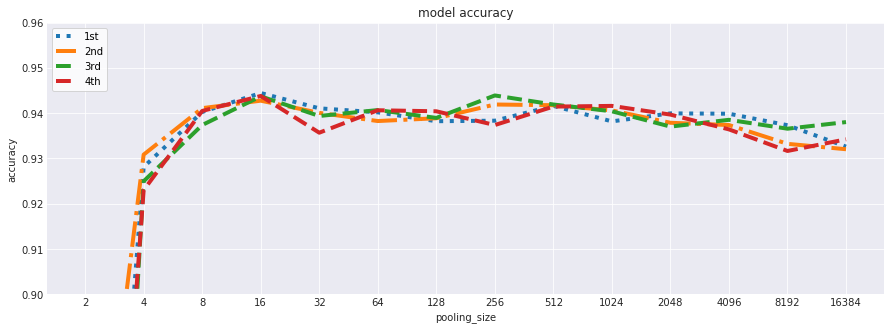

In [72]:
# PLOT ACCURACIES
#styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
#pooling_size = ['2','4','8','16','32']

plt.figure(figsize=(15,5))
#for i in range(nets):
#hi = [history[0].history['acc'][-1],history[1].history['acc'][-1],history[2].history['acc'][-1],history[3].history['acc'][-1],history[4].history['acc'][-1]]
with plt.style.context('seaborn-darkgrid'):
    plt.plot(pooling_size,[ele[1] for ele in model_result[:]],linestyle=styles[0],linewidth=4.0)
    plt.plot(pooling_size,[ele[1] for ele in model_result2[:]],linestyle=styles[1],linewidth=4.0)
    plt.plot(pooling_size,[ele[1] for ele in model_result3[:]],linestyle=styles[2],linewidth=4.0)
    plt.plot(pooling_size,[ele[1] for ele in model_result4[:]],linestyle=styles[2],linewidth=4.0)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('pooling_size')
#plt.legend(['loss','acc'], loc='upper left')
plt.legend(['1st','2nd','3rd','4th'], loc='upper left')

axes = plt.gca()
axes.set_ylim([0.90,0.96])
plt.show()

In [50]:
[ele[1] for ele in model_result[:]]

[0.60379535,
 0.92877996,
 0.9426859,
 0.9409573,
 0.9418024,
 0.93945915,
 0.9420329,
 0.9418408,
 0.94149506,
 0.9378457]

for 32 size:

0 Has auc 0.43976321874999996<br/>
1 Has auc 0.43392478125<br/>
2 Has auc 0.6040798749999999<br/>
3 Has auc 0.51007821875<br/>
4 Has auc 0.5680500312500001<br/>
5 Has auc 0.5620291562499999<br/>
6 Has auc 0.5593384687499999<br/>
7 Has auc 0.5599540937499999<br/>
8 Has auc 0.5035142499999999<br/>
9 Has auc 0.5222973125<br/>


In [7]:
train_acc= [0.42117,0.66418,0.86096,0.93424,0.94184,0.94570,0.95088,0.95242,0.95471,0.96154,0.96689,0.96711,0.96416,0.95643]
print(len(train_acc))

14


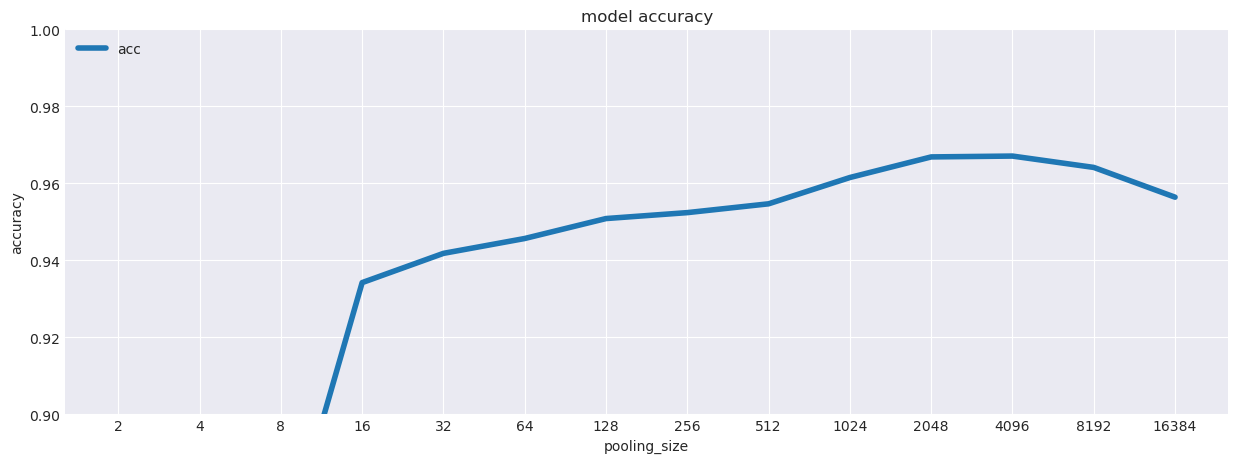

In [21]:
pooling_size = ['2','4','8','16','32','64','128','256','512','1024','2048','4096','8192','16384']
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
plt.figure(figsize=(15,5))
#for i in range(nets):
with plt.style.context('seaborn-darkgrid'):
#hi = [history[0].history['acc'][-1],history[1].history['acc'][-1],history[2].history['acc'][-1],history[3].history['acc'][-1],history[4].history['acc'][-1]]
    plt.plot(pooling_size,train_acc,linestyle=styles[3],linewidth=4.0)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('pooling_size')
    plt.legend(['acc','acc'], loc='upper left')
    axes = plt.gca()
    axes.set_ylim([0.9,1])
plt.show()